In [1]:
import astropy
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hdul = fits.open(r"C:\Users\amber\OneDrive\Desktop\SSI\Selected_stars_final.fits")
hdul.info()

Filename: C:\Users\amber\OneDrive\Desktop\SSI\Selected_stars_final.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (20, 2, 4000)   float64   


In [3]:
hdu = hdul[0]
data = hdu.data
data

array([[[1.02733700e+06, 6.96227980e+00, 7.42099991e+01, ...,
         2.88849996e+01, 0.00000000e+00, 7.40675000e+01],
        [0.00000000e+00, 3.09767991e-01, 0.00000000e+00, ...,
         3.29800018e-01, 0.00000000e+00, 2.00000000e-03]],

       [[1.16144700e+06, 4.16810989e+00, 3.63199997e+01, ...,
         5.85422713e+01, 0.00000000e+00, 3.64126000e+01],
        [0.00000000e+00, 8.03358018e-01, 0.00000000e+00, ...,
         4.85437113e-01, 0.00000000e+00, 3.80000000e-03]],

       [[1.16345300e+06, 4.44000006e+00, 4.03300018e+01, ...,
         2.53728516e+01, 0.00000000e+00, 4.03300000e+01],
        [0.00000000e+00, 3.15701991e-01, 0.00000000e+00, ...,
         2.22888550e-01, 0.00000000e+00, 3.70000000e-03]],

       ...,

       [[1.27846830e+07, 3.74499989e+00, 2.87199993e+01, ...,
         1.05284650e+01, 0.00000000e+00, 2.92100000e+01],
        [0.00000000e+00, 1.44336998e+00, 0.00000000e+00, ...,
         9.80607243e-02, 0.00000000e+00, 9.80000000e-03]],

       [[1.27849480

In [4]:
data_USE = np.transpose(data)
Teff = np.array(data_USE[4,1,:])
nu_max = np.array(data_USE[2,0,:])

In [5]:
Teff

array([4673., 4784., 5026., ..., 4991., 4889., 4644.])

In [6]:
nu_max

array([74.20999908, 36.31999969, 40.33000183, ..., 28.71999931,
       34.08000183, 50.59999847])

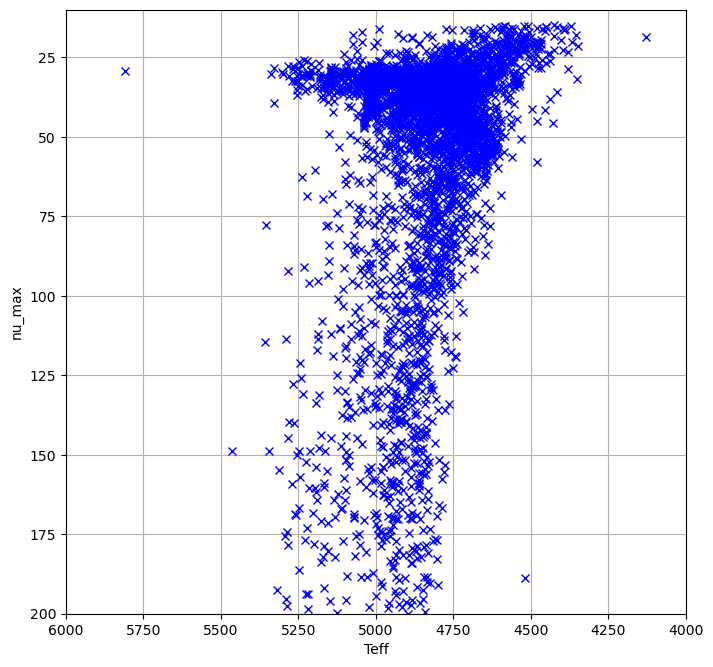

In [7]:
from matplotlib.pyplot import figure
figure(figsize=(8,8), dpi=100)
plt.grid()
plt.plot(Teff, nu_max, 'bx')
plt.xlim(6000, 4000)
plt.ylim(200, 10)
plt.xlabel('Teff')
plt.ylabel('nu_max')
plt.show()

In [8]:
hdul = fits.open(r"C:\Users\amber\OneDrive\Desktop\SSI\APOKASC_cat_v6.5.4.fits")
hdul.info()

Filename: C:\Users\amber\OneDrive\Desktop\SSI\APOKASC_cat_v6.5.4.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  Joined        1 BinTableHDU   1129   23363R x 430C   [20A, K, 20A, 20A, D, D, D, D, E, E, E, E, E, E, E, E, E, E, 23A, D, D, D, D, D, D, D, D, D, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 5A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E,

In [9]:
#prihdr = hdul[0].header #accesses primary header
hdu = hdul[1]
hdu.header #should show all column headers

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2272 / length of dimension 1                          
NAXIS2  =                23363 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                  430 / number of table fields                         
TTYPE1  = 'KEPLER_ID'                                                           
TFORM1  = '20A     '                                                            
TTYPE2  = 'KEPLER_INT'                                                          
TFORM2  = 'K       '                                                            
TNULL2  =               9999

In [10]:
TeffSun = 5774
gSun = 27395.9
numaxSun = 3090
gStar = ((Teff**0.5)*(nu_max)*(gSun))/((TeffSun**0.5)*(numaxSun))

In [12]:
Logg_A = hdu.data['LOGG_COR']
Logg_err = hdu.data['LOGG_COR_ERR']
Teff_A = hdu.data['TEFF_COR']
Teff_err = hdu.data['TEFF_COR_ERR']
FeH_A = hdu.data['FE_H_ADOP_COR']
print(max(FeH_A))
FeH_err = hdu.data['FE_H_ADOP_COR_ERR']
FeH_FIT = hdu.data['FE_H_ADOP_FIT']
Teff_FIT = hdu.data['TEFF_FIT']

0.56656843


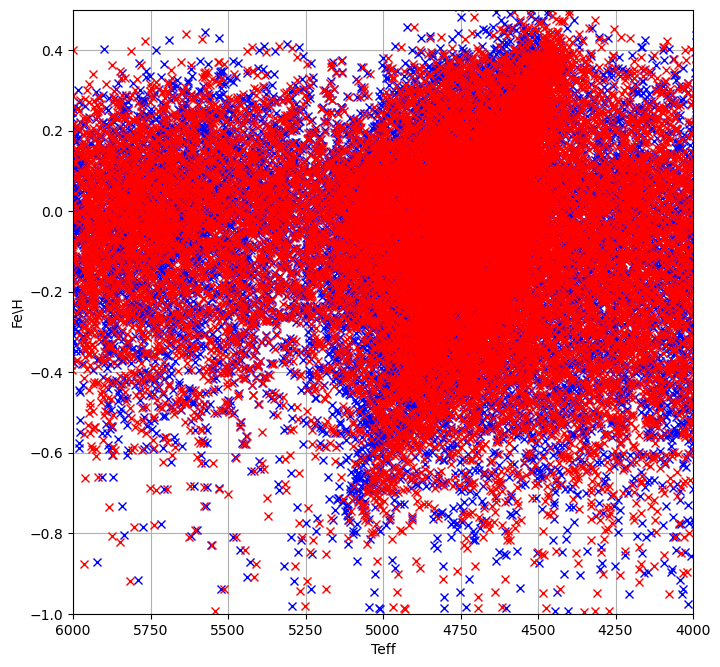

In [13]:
from matplotlib.pyplot import figure
figure(figsize=(8,8), dpi=100)
plt.grid()
x1 = Teff_A
x2 = Teff_FIT
y1 = FeH_A
y2 = FeH_FIT
plt.xlim(6000, 4000)
plt.ylim(-1.0, 0.5)
plt.xlabel('Teff')
plt.ylabel('Fe\H')
plt.plot(x1, y1, 'bx') #this is not right. Other order shows weird vertical lines. It's encountering errors when trying to use log scale.
#how to scale? Also how to input error params and exclude the 9 targets?
plt.plot(x2, y2, 'rx')
plt.show()

In [14]:
import pandas as pd
with fits.open(r"C:\Users\amber\OneDrive\Desktop\SSI\APOKASC_cat_v6.5.4.fits") as data:
    df = pd.DataFrame(data[0].data) #do same thing with APOGEE file? How to check matches for kic nums? I think you
    #use 'KEPLER_INT'
#compare background params of APOGEE to metallicity params of APOKASC -- graphs

In [15]:
KIC_num = hdu.data['KEPLER_INT']
hdul_back = fits.open(r"C:\Users\amber\OneDrive\Desktop\SSI\Selected_stars_final.fits")
hdu_back = hdul_back[0]
data_back = hdu_back.data
data_USE_back = np.transpose(data_back)
KIC_back = np.array(data_USE[0,0,:])
Teff_A = hdu.data['TEFF_COR']
Teff_err = hdu.data['TEFF_COR_ERR']
Logg_err = hdu.data['LOGG_COR_ERR']
FeH_err = hdu.data['FE_H_ADOP_COR_ERR']
logg_A = hdu.data['LOGG_COR']
FeH_A = hdu.data['FE_H_ADOP_COR']
Amp_HV1 = np.array(data_USE[6,0,:])
Amp_HV1_err = np.array(data_USE[6,1,:])
Amp_HV2 = np.array(data_USE[9,0,:])
Amp_HV2_err = np.array(data_USE[9,1,:])
Freq_HV1 = np.array(data_USE[7,0,:])
Freq_HV1_err = np.array(data_USE[7,1,:])
Freq_HV2 = np.array(data_USE[10,0,:])
Freq_HV2_err = np.array(data_USE[10,1,:])
Evol_stage = np.array(data_USE[3, 0, :])
Evol_stage
#Evol_stage = 1 - red giant, #2- red clump
#make color coded plot (or seperate ones for red giant branch and red clump) after other backg. plots

array([1., 2., 2., ..., 2., 2., 1.])

In [44]:
import numpy as np
common_KIC, Teff_indexes, Amp_indexes = np.intersect1d(KIC_num, KIC_back, return_indices=True)
good_indecies = np.where(Teff_A[Teff_indexes] > 0)
Amp_indexes = Amp_indexes[good_indecies]
Teff_indexes = Teff_indexes[good_indecies]
logg_final = Logg_A[Teff_indexes]
logg_final_err = Logg_err[Teff_indexes]
Teff_final = Teff_A[Teff_indexes]
Teff_final_err = Teff_err[Teff_indexes]
Teff_err_log = ((Teff_final_err)/(Teff_final))/np.log(10)
#print(Teff_err_log)
FeH_final = FeH_A[Teff_indexes]
FeH_final_err = FeH_err[Teff_indexes]
Amp_HV1_final = Amp_HV1[Amp_indexes]
Amp_HV1_final_err = Amp_HV1_err[Amp_indexes]
Amp_HV2_final = Amp_HV2[Amp_indexes]
Amp_HV2_final_err = Amp_HV2_err[Amp_indexes]
Evol_stage_final = Evol_stage[Amp_indexes]
print(Evol_stage_final)
Freq_HV1_final = Freq_HV1[Amp_indexes]
Freq_HV1_final_err = Freq_HV1_err[Amp_indexes]
Freq_HV2_final = Freq_HV2[Amp_indexes]
Freq_HV2_final_err = Freq_HV2_err[Amp_indexes]
Amp_HV1_err_log = ((Amp_HV1_final_err)/(Amp_HV1_final))/np.log(10)
Amp_HV2_err_log = ((Amp_HV2_final_err)/(Amp_HV2_final))/np.log(10)
Freq_HV1_err_log = ((Freq_HV1_final_err)/(Freq_HV1_final))/np.log(10)
Freq_HV2_err_log = ((Freq_HV2_final_err)/(Freq_HV2_final))/np.log(10)
#print(Amp_HV1, Amp_HV1_final_err)
#print(Amp_HV1_err_log, Amp_HV2_err_log, Freq_HV1_err_log, Freq_HV2_err_log)
print(Amp_HV1_final_err, Amp_HV2_final_err, Freq_HV1_final_err, Freq_HV2_final_err)
#Teff_final = Teff_final[good_indecies]
#print(FeH_final)
#print(min(FeH_final))
#print(max(FeH_final))
#np.size(Teff_final)
np.size(Amp_indexes)

[1. 2. 2. ... 2. 2. 1.]
[ 103.12402906  644.14808811  469.43677855 ... 1264.3873675   612.43433845
  370.48811596] [ 49.51467892 411.37846524 236.27512693 ... 609.06563579 281.41164637
 171.10605055] [0.60958386 0.56165511 0.47424818 ... 0.40305095 0.44899402 0.48264567] [1.09977728 1.27753428 0.98397972 ... 0.60349794 0.80824741 1.00152154]


3991

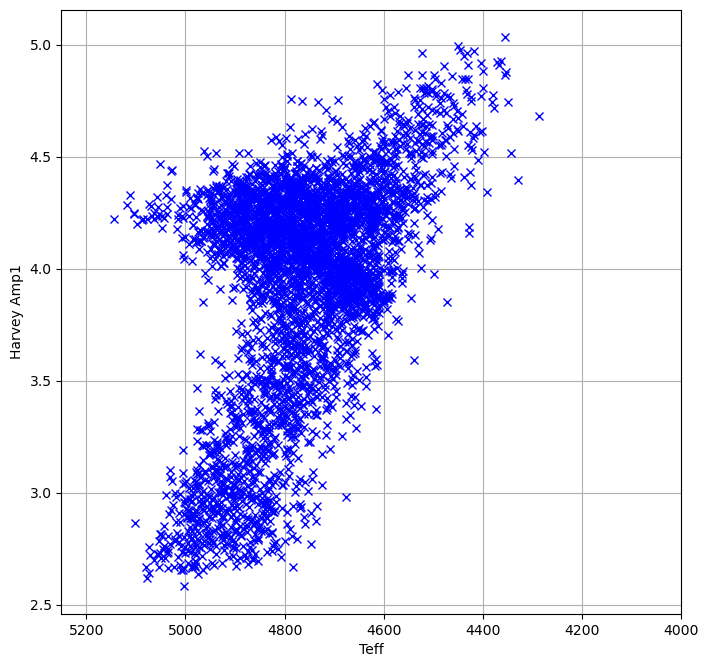

In [17]:
#Teff vs Harvey Amp 1
from matplotlib.pyplot import figure
figure(figsize=(8,8), dpi=100)
plt.grid()
y = np.log10(Amp_HV1_final)
plt.xlim(5250, 4000)
plt.xlabel('Teff')
plt.ylabel('Harvey Amp1')
plt.plot(Teff_final, y, 'bx')
plt.show()
#try log10 scaling, which one works better for other graphs (normally for harv freq)

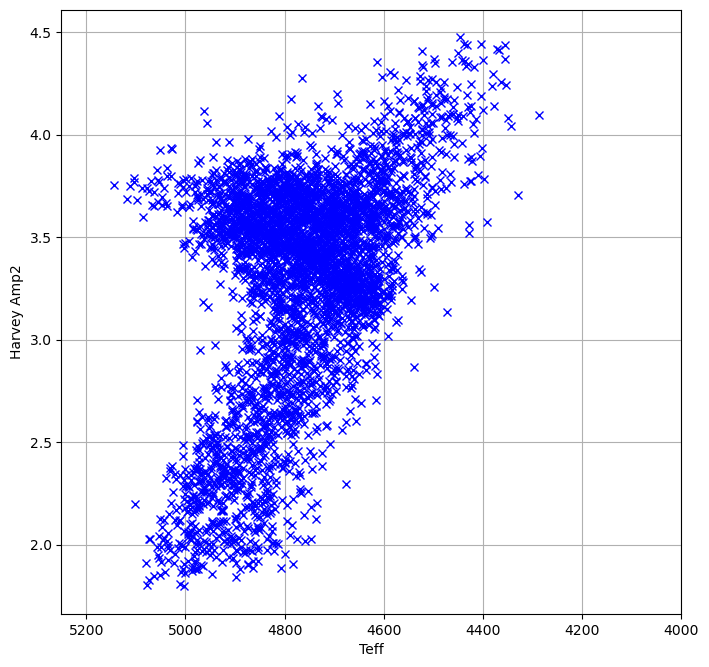

In [18]:
#Teff vs Harvey Amp 2
figure(figsize=(8,8), dpi=100)
plt.grid()
y = np.log10(Amp_HV2_final)
plt.xlim(5250, 4000)
plt.xlabel('Teff')
plt.ylabel('Harvey Amp2')
plt.plot(Teff_final, y, 'bx')
plt.show()

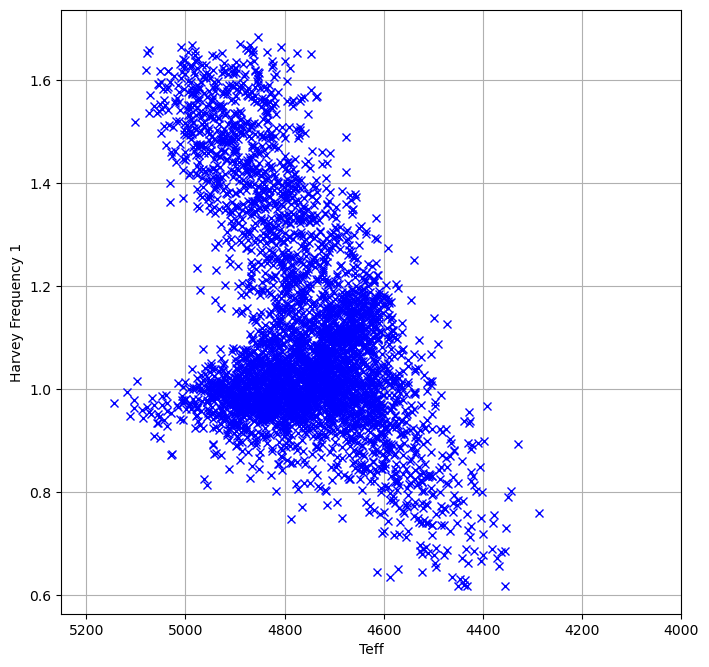

In [19]:
#Teff vs Harvey Frequency 1 -- is this what we wanted? Or switch axes
figure(figsize=(8,8), dpi=100)
plt.grid()
y = np.log10(Freq_HV1_final)
plt.xlim(5250, 4000)
plt.xlabel('Teff')
plt.ylabel('Harvey Frequency 1')
plt.plot(Teff_final, y, 'bx')
plt.show()

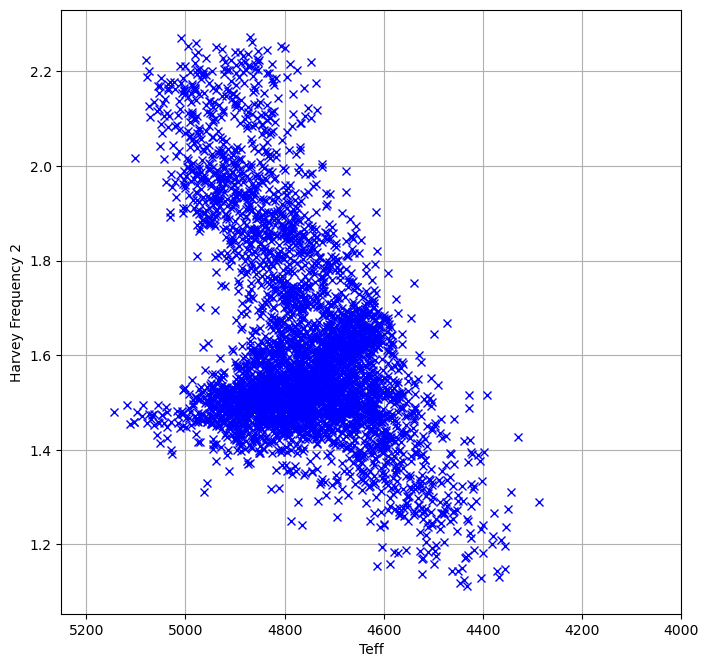

In [20]:
#Teff vs Harvey Frequency 2
figure(figsize=(8,8), dpi=100)
plt.grid()
y = np.log10(Freq_HV2_final)
plt.xlim(5250, 4000)
plt.xlabel('Teff')
plt.ylabel('Harvey Frequency 2')
plt.plot(Teff_final, y, 'bx')
plt.show()

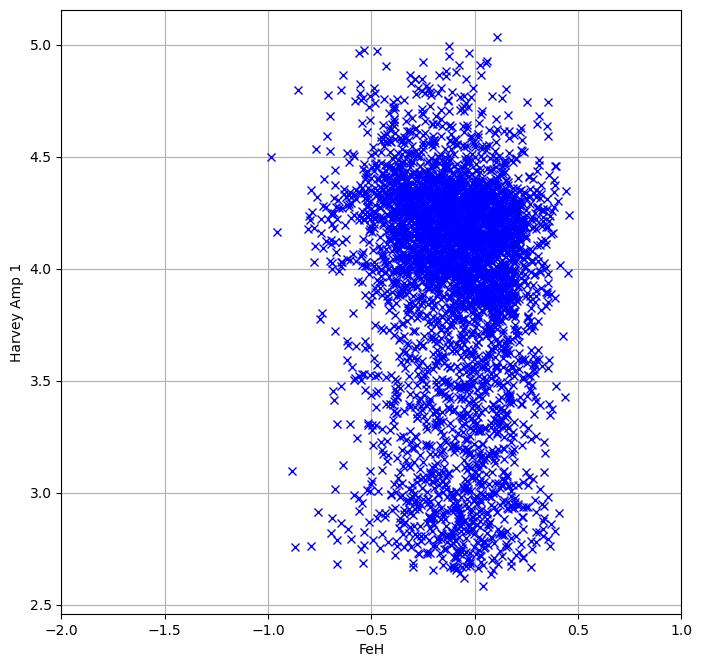

In [21]:
figure(figsize=(8,8), dpi=100)
plt.grid()
y = np.log10(Amp_HV1_final)
plt.xlim(-2, 1)
plt.xlabel('FeH')
plt.ylabel('Harvey Amp 1')
plt.plot(FeH_final, y, 'bx')
plt.show()

[19.79264072 -2.96756203 -1.92571531  0.06943987]
[0.94256458 0.26091547 0.00986458 0.01044836]
[16.93639866 -2.27271044 -2.06121137  0.06046755]
[1.04246012 0.28879224 0.01118713 0.01142943]


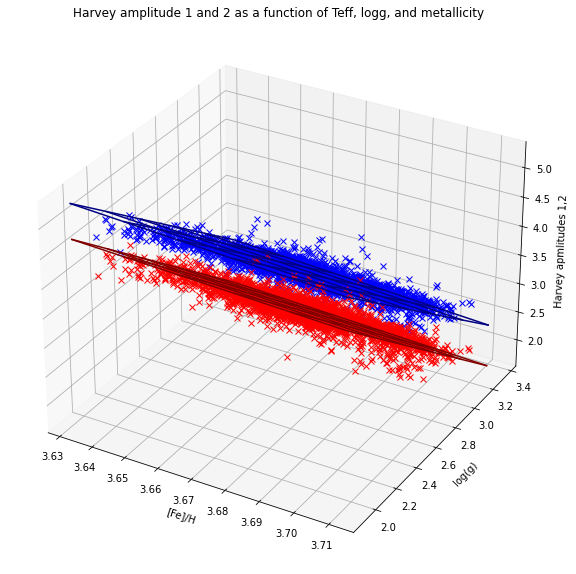

In [28]:
from scipy.optimize import curve_fit

%matplotlib inline
def amp_curve_fit(X, a, b, c, d):
    x,y,z = X
    return a+b*x+c*y+z*d

A1_opt, A1_cov = curve_fit(amp_curve_fit, (np.log10(Teff_final), logg_final, FeH_final), np.log10(Amp_HV1_final), sigma=(Amp_HV1_err_log))
A1_perr = np.sqrt(np.diag(A1_cov))

print(A1_opt)
print(A1_perr)

Nt = 6 
NFeH = 6
X_grid = np.indices((Nt, NFeH))

logT_grid = (X_grid[0,:,:]*(max(np.log10(Teff_final))-min(np.log10(Teff_final))))/(Nt-1)+min(np.log10(Teff_final))
logg_grid = (X_grid[1,:,:]*(max(logg_final)-min(logg_final)))/(NFeH-1)+min(logg_final)
FeH_grid = (X_grid[0,:,:])*0
log_A1_grid = amp_curve_fit((logT_grid, logg_grid, FeH_grid), A1_opt[0], A1_opt[1], A1_opt[2], A1_opt[3])


fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.set_title('Harvey amplitude 1 and 2 as a function of Teff, logg, and metallicity')

ax.set_xlabel('[Fe]/H')
ax.set_ylabel('log(g)')
ax.set_zlabel('Harvey apmlitudes 1,2')

A2_opt, A2_cov = curve_fit(amp_curve_fit, (np.log10(Teff_final), logg_final, FeH_final), np.log10(Amp_HV2_final), sigma=(Amp_HV2_err_log))
A2_perr = np.sqrt(np.diag(A2_cov))
log_A2_grid = amp_curve_fit((logT_grid, logg_grid, FeH_grid), A2_opt[0], A2_opt[1], A2_opt[2], A2_opt[3])

print(A2_opt)
print(A2_perr)

plt.plot(np.log10(Teff_final), logg_final, np.log10(Amp_HV1_final), 'bx')
plt.plot(np.log10(Teff_final), logg_final, np.log10(Amp_HV2_final), 'rx')
ax.plot_wireframe(logT_grid, logg_grid, log_A1_grid, color='navy')
ax.plot_wireframe(logT_grid, logg_grid, log_A2_grid, color='maroon')

plt.show()

[-1.28553565  0.07164322  0.82950025 -0.04048628]
[0.42177145 0.11681002 0.00448209 0.004626  ]
[-0.98025257  0.14230384  0.80519351 -0.02443755]
[0.36236767 0.10016298 0.00470983 0.00433746]


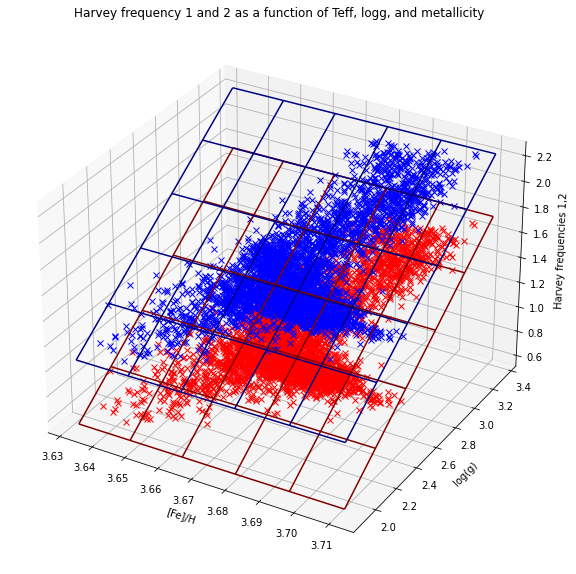

In [29]:
%matplotlib inline
def freq_curve_fit(X, a, b, c, d):
    x,y,z = X
    return a+b*x+c*y+z*d

F1_opt, F1_cov = curve_fit(freq_curve_fit, (np.log10(Teff_final), logg_final, FeH_final), np.log10(Freq_HV1_final), sigma=(Freq_HV1_err_log))
F1_perr = np.sqrt(np.diag(F1_cov))

print(F1_opt)
print(F1_perr)

Nt = 6 
NFeH = 6
X_grid = np.indices((Nt, NFeH))

logT_grid = (X_grid[0,:,:]*(max(np.log10(Teff_final))-min(np.log10(Teff_final))))/(Nt-1)+min(np.log10(Teff_final))
logg_grid = (X_grid[1,:,:]*(max(logg_final)-min(logg_final)))/(NFeH-1)+min(logg_final)
FeH_grid = (X_grid[0,:,:])*0
log_F1_grid = freq_curve_fit((logT_grid, logg_grid, FeH_grid), F1_opt[0], F1_opt[1], F1_opt[2], F1_opt[3])

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.set_title('Harvey frequency 1 and 2 as a function of Teff, logg, and metallicity')

ax.set_xlabel('[Fe]/H')
ax.set_ylabel('log(g)')
ax.set_zlabel('Harvey frequencies 1,2')

F2_opt, F2_cov = curve_fit(freq_curve_fit, (np.log10(Teff_final), logg_final, FeH_final), np.log10(Freq_HV2_final), sigma=(Freq_HV2_err_log))
F2_perr = np.sqrt(np.diag(F2_cov))
log_F2_grid = freq_curve_fit((logT_grid, logg_grid, FeH_grid), F2_opt[0], F2_opt[1], F2_opt[2], F2_opt[3])

print(F2_opt)
print(F2_perr)

plt.plot(np.log10(Teff_final), logg_final, np.log10(Freq_HV1_final), 'rx')
plt.plot(np.log10(Teff_final), logg_final, np.log10(Freq_HV2_final), 'bx')
ax.plot_wireframe(logT_grid, logg_grid, log_F1_grid, color='maroon')
ax.plot_wireframe(logT_grid, logg_grid, log_F2_grid, color='navy')

plt.show()

0.0392773135862695
[-4.45832606  1.08745664  0.80848197 -0.03224601]
[0.92910816 0.26155273 0.00619066 0.00789118]
[-23.85018905   6.74787599   0.46658834   0.32727597]
[0.72014065 0.20274881 0.01129693 0.00867618]


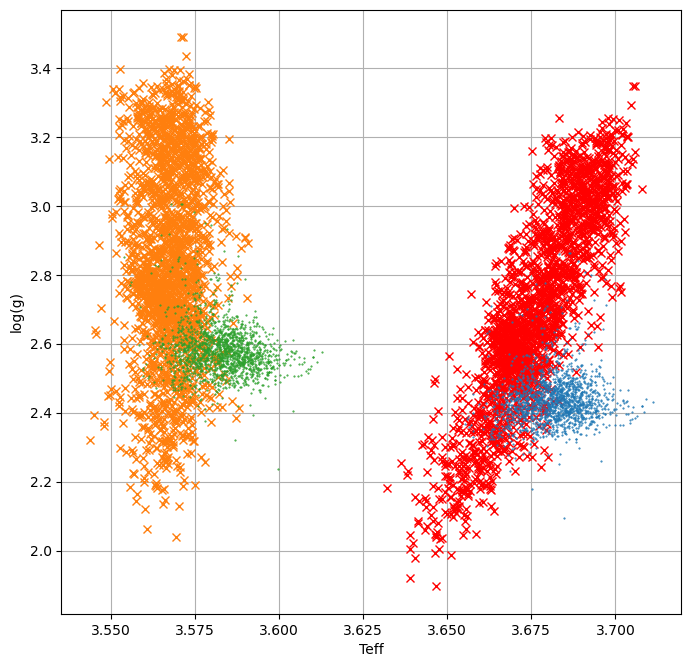

In [112]:
#Teff, logg graph with red giants & clump
from matplotlib.pyplot import figure
from scipy.optimize import curve_fit
figure(figsize=(8,8), dpi=100)
plt.grid()

red_giant = np.where(Evol_stage_final == 1)
red_clump = np.where(Evol_stage_final == 2)

def logg_fit(X, a, b):
    x = X
    return a + b*x
         
logg_opt, logg_cov = curve_fit(logg_fit, (np.log10(Teff_final[red_giant])), logg_final[red_giant], sigma=(logg_final_err[red_giant]))
logg_perr = np.sqrt(np.diag(logg_cov))

#print(logg_opt)
#print(logg_perr)

theta = ((np.pi/2) - np.arctan2(logg_opt[1], 1))/1.453
print(theta)

#rotated plots
x_prime = (np.log10(Teff_final)*np.cos(theta)) - (logg_final*np.sin(theta))
y_prime = (np.log10(Teff_final)*np.sin(theta)) + (logg_final*np.cos(theta))


#print(x_prime)
#print(y_prime)


F2_x_opt, F2_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant], y_prime[red_giant], FeH_final[red_giant]), np.log10(Freq_HV2_final[red_giant]), sigma=(Freq_HV2_err_log[red_giant]))
F2_x_perr = np.sqrt(np.diag(F2_x_cov))

#in y direc -- dependancy very well constrained, x direc not really
print(F2_x_opt)
print(F2_x_perr)

F2_x_opt, F2_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump], y_prime[red_clump], FeH_final[red_clump]), np.log10(Freq_HV2_final[red_clump]), sigma=(Freq_HV2_err_log[red_clump]))
F2_x_perr = np.sqrt(np.diag(F2_x_cov))

#fit more well defined in x direc now in clump, y direc worse
#red giant and red clump have opposite metallicity dependancy -- interesting
print(F2_x_opt)
print(F2_x_perr)

#print(red_giant)
#print(red_clump)

plt.plot(np.log10(Teff_final[red_giant]), logg_final[red_giant], 'rx')
plt.plot(np.log10(Teff_final[red_clump]), logg_final[red_clump], '.', ms=1)
plt.plot(x_prime[red_giant], y_prime[red_giant], 'x')
plt.plot(x_prime[red_clump], y_prime[red_clump], '.', ms=1)
    
#plt.xlim(3.4, 3.8)
#plt.ylim(1.8, 3.6)
plt.xlabel('Teff')
plt.ylabel('log(g)')
plt.show()

#plot 3d plot with 2 planes: one describing the giants, and one the red clump. Color rgb and clump stars differently. Plane for clump stars can be small
#of the transformed one